# Library

In [1]:
# Ignore the warnings
import warnings
# warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# System related and data input controls
import os

# Auto reload of library
%reload_ext autoreload
%autoreload 2

# Python path
import sys
base_folder = 'DataScience'
location_base = os.path.join(os.getcwd().split(base_folder)[0], base_folder)
location_module = [os.path.join(location_base, 'Module')] 
for each in location_module:
    if each not in sys.path:
        sys.path.append(each)
        
from import_KK import *
DeviceStrategy_CPU()
from preprocessing_KK import *
from preprocessing_text_KK import * ##
from visualization_KK import * ##
from algorithm_textmining_KK import *
from algorithm_machinelearning_KK import *
from algorithm_deeplearning_KK import *
from evaluation_KK import *

# 하이퍼파라미터
IMAGE_LOCATION = os.path.join('.', 'Data', 'Image', 'baby-icon_ver1.png')
IMAGE_LOCATION = os.path.join('.', 'Data', 'Image', 'care.png')

JAVA is in the system path?:  False
JAVA is in the system path?:  Adding...
Operation Machine:  Intel64 Family 6 Model 186 Stepping 2, GenuineIntel
Operation Platform:  64bit
OS Type:  Windows
OS Version:  10
Python Version:  3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]


2023-11-15 04:13:39,060	INFO worker.py:1642 -- Started a local Ray instance.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KK\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\KK\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


2023-11-15 04:14:06,109	INFO worker.py:1476 -- Calling ray.init() again after it has already been called.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KK\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\KK\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Result1

In [32]:
# 데이터 로딩
file_location = os.path.join(os.getcwd(), 'Data', 'Interview', 'interview_text_KK.xlsx')
df = pd.read_excel(file_location)

stopwords_list = ['아', '휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희', '따라', '의해', '을', '를', '에', '의', '가', '으로', 
 '로', '에게', '뿐이다', '의거하여', '근거하여', '입각하여', '기준으로', '예하면', '예를 들면', '예를 들자면', '저', '소인', 
 '소생', '저희', '지말고', '하지마', '하지마라', '다른', '물론', '또한', '그리고', '비길수 없다', '해서는 안된다', '뿐만 아니라', 
 '만이 아니다', '만은 아니다', '막론하고', '관계없이', '그치지 않다', '그러나', '그런데', '하지만', '든간에', '논하지 않다',
 '따지지 않다', '설사', '비록', '더라도', '아니면', '만 못하다', '하는 편이 낫다', '불문하고', '향하여', '향해서', '향하다',
 '쪽으로', '틈타', '이용하여', '타다', '오르다', '제외하고', '이 외에', '이 밖에', '하여야', '비로소', '한다면 몰라도', '외에도',
 '이곳', '여기', '부터', '기점으로', '따라서', '할 생각이다', '하려고하다', '이리하여', '그리하여', '그렇게 함으로써', '하지만',
 '일때', '할때', '앞에서', '중에서', '보는데서', '으로써', '로써', '까지', '해야한다', '일것이다', '반드시', '할줄알다',
 '할수있다', '할수있어', '임에 틀림없다', '한다면', '등', '등등', '제', '겨우', '단지', '다만', '할뿐', '딩동', '댕그', '대해서',
 '대하여', '대하면', '훨씬', '얼마나', '얼마만큼', '얼마큼', '남짓', '여', '얼마간', '약간', '다소', '좀', '조금', '다수', '몇',
 '얼마', '지만', '하물며', '또한', '그러나', '그렇지만', '하지만', '이외에도', '대해 말하자면', '뿐이다', '다음에', '반대로',
 '반대로 말하자면', '이와 반대로', '바꾸어서 말하면', '바꾸어서 한다면', '만약', '그렇지않으면', '까악', '툭', '딱', '삐걱거리다',
 '보드득', '비걱거리다', '꽈당', '응당', '해야한다', '에 가서', '각', '각각', '여러분', '각종', '각자', '제각기', '하도록하다',
 '와', '과', '그러므로', '그래서', '고로', '한 까닭에', '하기 때문에', '거니와', '이지만', '대하여', '관하여', '관한', '과연',
 '실로', '아니나다를가', '생각한대로', '진짜로', '한적이있다', '하곤하였다', '하', '하하', '허허', '아하', '거바', '와', '오',
 '왜', '어째서', '무엇때문에', '어찌', '하겠는가', '무슨', '어디', '어느곳', '더군다나', '하물며', '더욱이는', '어느때', '언제',
 '야', '이봐', '어이', '여보시오', '흐흐', '흥', '휴', '헉헉', '헐떡헐떡', '영차', '여차', '어기여차', '끙끙', '아야', '앗',
 '아야', '콸콸', '졸졸', '좍좍', '뚝뚝', '주룩주룩', '솨', '우르르', '그래도', '또', '그리고', '바꾸어말하면', '바꾸어말하자면',
 '혹은', '혹시', '답다', '및', '그에 따르는', '때가 되어', '즉', '지든지', '설령', '가령', '하더라도', '할지라도', '일지라도',
 '지든지', '몇', '거의', '하마터면', '인젠', '이젠', '된바에야', '된이상', '만큼어찌됏든', '그위에', '게다가', '점에서 보아',
 '비추어 보아', '고려하면', '하게될것이다', '일것이다', '비교적', '좀', '보다더', '비하면', '시키다', '하게하다', '할만하다',
 '의해서', '연이서', '이어서', '잇따라', '뒤따라', '뒤이어', '결국', '의지하여', '기대여', '통하여', '자마자', '더욱더',
 '불구하고', '얼마든지', '마음대로', '주저하지 않고', '곧', '즉시', '바로', '당장', '하자마자', '밖에 안된다', '하면된다',
 '그래', '그렇지', '요컨대', '다시 말하자면', '바꿔 말하면', '즉', '구체적으로', '말하자면', '시작하여', '시초에', '이상', '허',
 '헉', '허걱', '바와같이', '해도좋다', '해도된다', '게다가', '더구나', '하물며', '와르르', '팍', '퍽', '펄렁', '동안', '이래',
 '하고있었다', '이었다', '에서', '로부터', '까지', '예하면', '했어요', '해요', '함께', '같이', '더불어', '마저', '마저도',
 '양자', '모두', '습니다', '가까스로', '하려고하다', '즈음하여', '다른', '다른 방면으로', '해봐요', '습니까', '했어요',
 '말할것도 없고', '무릎쓰고', '개의치않고', '하는것만 못하다', '하는것이 낫다', '매', '매번', '들', '모', '어느것', '어느',
 '로써', '갖고말하자면', '어디', '어느쪽', '어느것', '어느해', '어느 년도', '라 해도', '언젠가', '어떤것', '어느것', '저기',
 '저쪽', '저것', '그때', '그럼', '그러면', '요만한걸', '그래', '그때', '저것만큼', '그저', '이르기까지', '할 줄 안다',
 '할 힘이 있다', '너', '너희', '당신', '어찌', '설마', '차라리', '할지언정', '할지라도', '할망정', '할지언정', '구토하다',
 '게우다', '토하다', '메쓰겁다', '옆사람', '퉤', '쳇', '의거하여', '근거하여', '의해', '따라', '힘입어', '그', '다음', '버금',
 '두번째로', '기타', '첫번째로', '나머지는', '그중에서', '견지에서', '형식으로 쓰여', '입장에서', '위해서', '단지', '의해되다',
 '하도록시키다', '뿐만아니라', '반대로', '전후', '전자', '앞의것', '잠시', '잠깐', '하면서', '그렇지만', '다음에', '그러한즉',
 '그런즉', '남들', '아무거나', '어찌하든지', '같다', '비슷하다', '예컨대', '이럴정도로', '어떻게', '만약', '만일',
 '위에서 서술한바와같이', '인 듯하다', '하지 않는다면', '만약에', '무엇', '무슨', '어느', '어떤', '아래윗', '조차', '한데',
 '그럼에도 불구하고', '여전히', '심지어', '까지도', '조차도', '하지 않도록', '않기 위하여', '때', '시각', '무렵', '시간',
 '동안', '어때', '어떠한', '하여금', '네', '예', '우선', '누구', '누가 알겠는가', '아무도', '줄은모른다', '줄은 몰랏다',
 '하는 김에', '겸사겸사', '하는바', '그런 까닭에', '한 이유는', '그러니', '그러니까', '때문에', '그', '너희', '그들', '너희들',
 '타인', '것', '것들', '너', '위하여', '공동으로', '동시에', '하기 위하여', '어찌하여', '무엇때문에', '붕붕', '윙윙', '나',
 '우리', '엉엉', '휘익', '윙윙', '오호', '아하', '어쨋든', '만 못하다하기보다는', '차라리', '하는 편이 낫다', '흐흐', '놀라다',
 '상대적으로 말하자면', '마치', '아니라면', '쉿', '그렇지 않으면', '그렇지 않다면', '안 그러면', '아니었다면', '하든지', '아니면',
 '이라면', '좋아', '알았어', '하는것도', '그만이다', '어쩔수 없다', '하나', '일', '일반적으로', '일단', '한켠으로는', '오자마자',
 '이렇게되면', '이와같다면', '전부', '한마디', '한항목', '근거로', '하기에', '아울러', '하지 않도록', '않기 위해서', '이르기까지',
 '이 되다', '로 인하여', '까닭으로', '이유만으로', '이로 인하여', '그래서', '이 때문에', '그러므로', '그런 까닭에', '알 수 있다',
 '결론을 낼 수 있다', '으로 인하여', '있다', '어떤것', '관계가 있다', '관련이 있다', '연관되다', '어떤것들', '에 대해', '이리하여',
 '그리하여', '여부', '하기보다는', '하느니', '하면 할수록', '운운', '이러이러하다', '하구나', '하도다', '다시말하면', '다음으로',
 '에 있다', '에 달려 있다', '우리', '우리들', '오히려', '하기는한데', '어떻게', '어떻해', '어찌됏어', '어때', '어째서', '본대로',
 '자', '이', '이쪽', '여기', '이것', '이번', '이렇게말하자면', '이런', '이러한', '이와 같은', '요만큼', '요만한 것',
 '얼마 안 되는 것', '이만큼', '이 정도의', '이렇게 많은 것', '이와 같다', '이때', '이렇구나', '것과 같이', '끼익', '삐걱', '따위',
 '와 같은 사람들', '부류의 사람들', '왜냐하면', '중의하나', '오직', '오로지', '에 한하다', '하기만 하면', '도착하다',
 '까지 미치다', '도달하다', '정도에 이르다', '할 지경이다', '결과에 이르다', '관해서는', '여러분', '하고 있다', '한 후', '혼자',
 '자기', '자기집', '자신', '우에 종합한것과같이', '총적으로 보면', '총적으로 말하면', '총적으로', '대로 하다', '으로서', '참',
 '그만이다', '할 따름이다', '쿵', '탕탕', '쾅쾅', '둥둥', '봐', '봐라', '아이야', '아니', '와아', '응', '아이', '참나', '년',
 '월', '일', '령', '영', '일', '이', '삼', '사', '오', '육', '륙', '칠', '팔', '구', '이천육', '이천칠', '이천팔', '이천구',
 '하나', '둘', '셋', '넷', '다섯', '여섯', '일곱', '여덟', '아홉', '령', '영',
                 '외할머니', '진짜', '그걸', '때문', '얘기', '심하', '못하', '어떻', '사실', '거예요', '어르', '느끼',
                 '그렇', '드리', '뭔가', '그것', '가지', '이걸', '그러', '계시', '이러', '대하', '이거', '거기', '위하',
                 '보이', '그거', '이렇', '이분', '거지', '모르', '모시', '음주', '만들', '정도', '근데', '관련', '말씀드리', '경우',
                 '지금', '배우', '부분들',
                 '다르', '가운데', '어쩌', '아침', '그다음', '없애', '나가', '키우', '다니', '내리', '세금', '연령', '버리', '어리', '보내', '6시',
                 '모델', '통하', '생기', '늦추', '직장', '교과서', '평균', '연금', '이론']

hannanum, kkma, komoran, okt = Hannanum(), Kkma(), Komoran(), Okt()
# mecab = Mecab()
token_noun, token_others, token_all = [], [], []
for val in df.Interview.values:
    token = [token for token, part in hannanum.pos(val) 
             if (part[0] == 'N') & (len(token) != 1) & (token not in stopwords_list)]
    token_noun.append(token)
    token = [token for token, part in hannanum.pos(val) 
             if (part[0] == 'P') & (len(token) != 1) & (token not in stopwords_list)]
    token_others.append(token)
    token = [token for token, part in hannanum.pos(val) 
             if (part[0] in ['P', 'N']) & (len(token) != 1) & (token not in stopwords_list)]
    token_all.append(token)
    
df_token = pd.concat([pd.Series(token_noun), pd.Series(token_others), pd.Series(token_all)], axis=1)
df_token.columns = ['Answer_N', 'Answer_P', 'Answer_NP']

# 정리
df = pd.concat([df, df_token], axis=1)
index_NP = df.Answer_NP[df.Answer_NP.apply(lambda x: len(x)) != 0].index
df = df.iloc[index_NP].copy()
df_sub1 = df[df.Candidate.isin(['윤소훈', '최지원', '기우진'])]
df_sub2 = df[~df.Candidate.isin(['윤소훈', '최지원', '기우진'])]

0

Topic 1  Topic 2  Topic 3
0     "대상"    "노인들"     "연구" 
1     "이웃"     "공간"     "최근" 
2     "시작"    "어르신"   "어르신들" 
3     "가치"     "혐오"    "가족들" 
4     "세대"    "누군가"    "경제적" 
5     "증명"     "치매"     "부담" 
6     "문제"    "미디어"     "경험" 
7     "해결"     "기업"    "양극화" 
8     "병원"     "세상"    "백내장" 
9     "집단"    "노인분"     "생각" 
10    "마음"    "사람들"     "사진" 
11    "만나"    "인터넷"     "어렵" 
12   "대부분"    "페이퍼"     "있긴" 
13    "다양"    "자녀들"     "상황" 
14    "배제"    "분위기"     "폐지" 
15    "기술"     "관심"     "변하" 
16    "바뀌"     "불편"     "말씀" 
17  "할아버지"    "이미지"     "미술" 
18    "지원"    "이야기"     "제도" 
19   "시스템"     "힘들"     "순간" 
20   "캔버스"    "청년들"     "대립" 
21    "활동"     "건강"     "단어" 
22    "사람"     "모습"     "특정" 
23   "사회적"     "사회"     "필요" 
24   "드러나"    "65세"     "생산" 
25    "노인"     "질환"     "자체" 
26    "가족"     "상태"     "청년" 
27    "진행"     "역할"     "돌보" 
28    "나이"     "키트"     "운동" 
29   "파킨슨"     "표현"     "프레" 
30  "임직원들"     "단계"    "할머니" 
31    "주변"     "운동"     "고민" 
32    "국가"     "고민"     "단계" 
33    "식사"     "프레"     "지식" 
34    "당시"     "자체"     "건강" 
35    "현역"     "지식"     "표현" 
36    "표현"    "할머니"     "당시" 
37    "지식"     "주변"     "식사" 
38    "고민"     "대립"     "현역" 
39    "질환"     "특정"    "65세" 
40   "할머니"     "현역"     "키트" 
41    "상태"     "나이"     "사회" 
42    "단계"     "필요"     "국가" 
43    "모습"    "캔버스"   "임직원들" 
44    "역할"     "제도"     "역할" 
45   "청년들"     "돌보"    "파킨슨" 
46    "키트"     "당시"    "이야기" 
47    "청년"     "청년"     "힘들" 
48    "상황"     "말씀"     "상태" 
49    "생산"     "폐지"     "가족" 
50    "불편"     "바뀌"    "자녀들" 
51    "순간"     "국가"     "진행" 
52    "돌보"     "변하"     "질환" 
53   "페이퍼"     "있긴"     "모습" 
54    "어렵"     "단어"     "관심" 
55   "경제적"     "배제"    "청년들" 
56   "이미지"    "드러나"    "분위기" 
57    "단어"     "사람"     "노인" 
58    "사회"     "사진"    "시스템" 
59    "프레"     "미술"     "활동" 
60   "65세"    "사회적"     "지원" 
61    "미술"     "만나"     "치매" 
62   "사람들"     "기술"     "주변" 
63    "세상"     "최근"    "사회적" 
64   "인터넷"    "파킨슨"    "누군가" 
65    "운동"     "경험"    "드러나" 
66    "변하"   "임직원들"     "나이" 
67   "분위기"     "생각"   "할아버지" 
68    "힘들"     "생산"     "사람" 
69    "말씀"    "가족들"    "이미지" 
70    "제도"     "식사"    "인터넷" 
71    "부담"     "노인"    "대부분" 
72    "있긴"     "순간"     "다양" 
73   "양극화"     "가치"     "기업" 
74    "필요"   "할아버지"    "노인분" 
75    "관심"     "다양"     "마음" 
76   "백내장"    "백내장"     "시작" 
77   "미디어"     "진행"     "기술" 
78    "생각"     "활동"     "불편" 
79   "노인분"     "증명"     "집단" 
80    "사진"     "세대"     "병원" 
81    "폐지"     "해결"    "어르신" 
82   "이야기"     "병원"     "문제" 
83  "어르신들"    "양극화"     "해결" 
84    "특정"     "문제"     "혐오" 
85    "대립"     "집단"     "세상" 
86    "경험"     "가족"     "만나" 
87    "기업"    "시스템"    "사람들" 
88    "자체"     "부담"     "배제" 
89    "혐오"     "마음"     "바뀌" 
90   "가족들"     "지원"    "미디어" 
91   "자녀들"   "어르신들"     "대상" 
92    "연구"    "대부분"     "증명" 
93    "최근"     "이웃"    "캔버스" 
94    "공간"     "어렵"     "세대" 
95    "건강"     "상황"    "페이퍼" 
96   "어르신"     "연구"     "이웃" 
97   "노인들"     "대상"     "가치" 
98   "누군가"     "시작"    "노인들" 
99     "치매"    "경제적"     "공간"

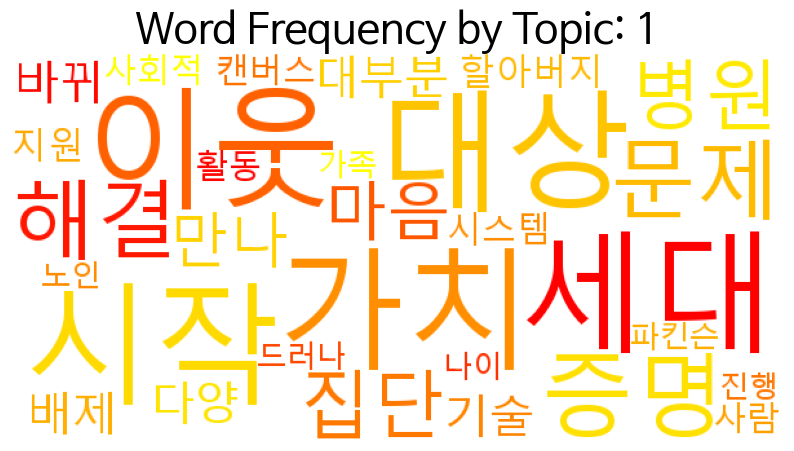

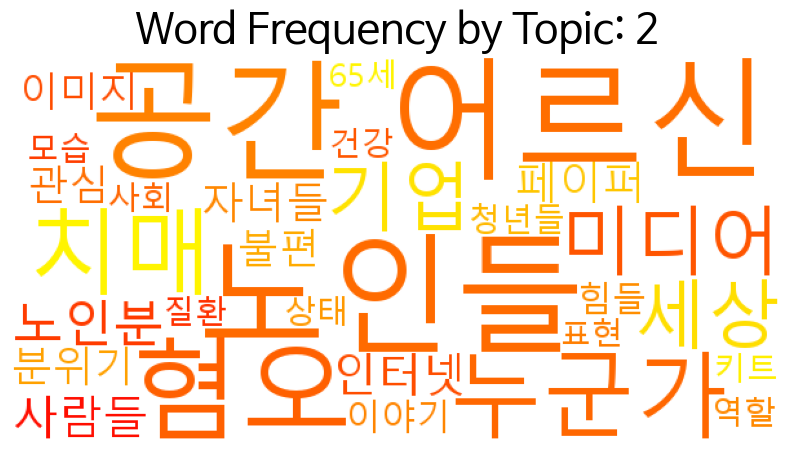

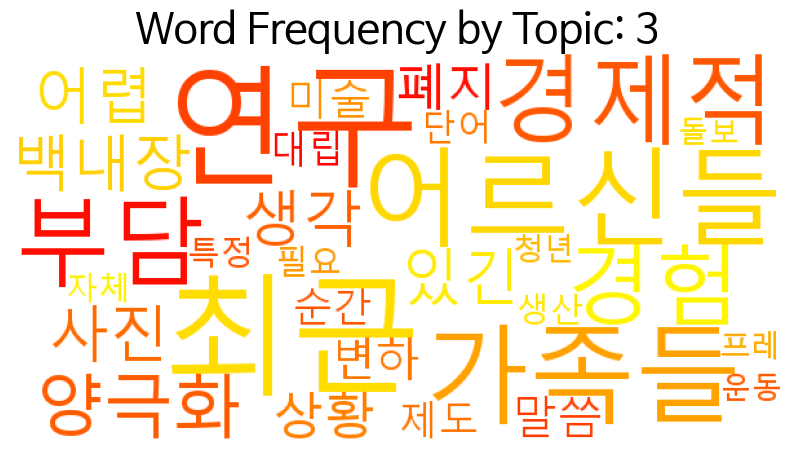

In [33]:
df_interview = df_sub1['Answer_NP'].apply(lambda x: list(x))
df_dict = dict()
df_dict[0] = [j for i in df_interview for j in i]
for key, val in df_dict.items():
    display(key)    
    ### DTM
    sentence_hstack = [" ".join(val)]
    tokenizer = CountVectorizer(max_features=100)
    tokenizer.fit(sentence_hstack)
    sentence_encoded = tokenizer.transform(sentence_hstack).toarray()
    sentence_encoded = sentence_encoded.tolist()
    colnames = [key for key, value in sorted(tokenizer.vocabulary_.items(), key=lambda item: item[1])]
    idxnames = ['sentence' + str(i+1) for i in range(np.shape(sentence_encoded)[0])]
    DTM = pd.DataFrame(sentence_encoded, columns=colnames, index=idxnames)

    ### Coherence Score
    texts = [[word for word in document.split()] for document in DTM]
    idx2word = corpora.Dictionary(texts)
    corpus = [idx2word.doc2bow(text) for text in texts]

    # LDA 모델링
    num_topics = 3
    model_lda = LdaModel(corpus=corpus, id2word=idx2word, num_topics=num_topics, 
                         passes=5, random_state=123)

    # 토픽별 결과 정리
    topic_keyword, topic_kwdfreq = dict(), dict()
    for topic, keywords in model_lda.show_topics(num_words=200):
        topic_keyword[topic] = [keyword.split('*')[1] for keyword in keywords.split('+')]
        topic_kwdfreq[topic] = {keyword.split('*')[1][1:-2]:float(keyword.split('*')[0])  for keyword in keywords.split('+')}

    topic_keyword = pd.DataFrame.from_dict(topic_keyword)
    topic_keyword.columns = ['Topic '+str(i+1) for i in range(num_topics)]
    display(topic_keyword)

    # 빈도수 워드클라우드 시각화
    word_clouder = WordCloud(font_path=r'C:\Windows\Fonts\malgun.ttf',
                             background_color='white',    # 배경색
                             colormap='autumn',    # 글자컬러맵
                             width=600, height=300,    # 폭과 높이로 figsize랑 맞추어야
                             random_state=123,    # 랜덤 시각화 고정
                             prefer_horizontal=True,    # 수평글자로 기록
                             max_font_size=100,    # 최대 폰트 크기
                             max_words=30)    # 표현할 최대 단어 갯수

    for key, val in topic_kwdfreq.items():
        word_cloud = word_clouder.generate_from_frequencies(val)
        plt.figure(figsize=(10,8))    # 캔버스 사이즈
        plt.imshow(word_cloud)
        plt.title('Word Frequency by Topic: ' + str(key+1), fontsize=30)    # 제목과 사이즈
        plt.axis('off')    # 그래프 축을 제거
        plt.show()

0

Topic 1  Topic 2  Topic 3
0    "노인들"    "기다리"    "아름답" 
1     "역할"     "계층"   "젊은이들" 
2     "설명"     "세상"    "시니어" 
3     "가족"     "행복"     "가정" 
4     "상황"     "기력"     "건강" 
5     "이유"     "정부"     "복지" 
6     "만나"     "문제"    "경제적" 
7     "필요"     "관계"     "세대" 
8     "변화"     "새벽"     "발달" 
9     "자녀"   "기도하자"    "사회적" 
10  "대한민국"     "불구"     "불안" 
11    "동화"     "용어"     "세력" 
12    "노인"     "지혜"     "운동" 
13   "기본적"     "유머"     "사회" 
14    "바라"     "본인"     "차별" 
15    "공존"    "공동체"     "방법" 
16    "믿음"     "봉사"    "떨어지" 
17    "친구"     "어렵"     "미안" 
18    "인생"     "언어"     "의학" 
19    "생활"     "힘들"     "생각" 
20   "정서적"     "적절"     "노년" 
21    "활동"     "가치"     "나라" 
22    "부담"     "마음"     "중요" 
23    "사람"     "비슷"     "청년" 
24    "단어"    "65세"     "상담" 
25   "긍정적"    "일자리"     "은퇴" 
26   "가르치"    "사람들"     "자원" 
27    "인정"     "시대"     "능력" 
28    "교육"     "주장"     "양보" 
29  "지역사회"     "차이"     "창피" 
30  "우리나라"     "끝나"     "측면" 
31   "이야기"     "양보"     "경험" 
32    "공부"     "경험"     "끝나" 
33    "세계"     "창피"     "이해" 
34    "나이"     "은퇴"     "가치" 
35   "할머니"     "이해"     "차이" 
36    "차이"     "측면"     "나이" 
37    "이해"    "이야기"     "세계" 
38    "경험"     "노년"    "할머니" 
39   "일자리"     "중요"    "65세" 
40    "측면"    "할머니"     "주장" 
41   "사람들"     "교육"     "비슷" 
42    "끝나"     "청년"     "공부" 
43    "마음"    "정서적"   "우리나라" 
44    "시대"     "의학"     "시대" 
45    "적절"     "능력"   "지역사회" 
46    "주장"     "나이"     "언어" 
47    "자원"     "자원"     "힘들" 
48    "사회"    "떨어지"    "사람들" 
49    "상담"     "차별"    "가르치" 
50    "봉사"     "믿음"     "유머" 
51    "생각"     "공부"     "인정" 
52    "능력"     "방법"    "일자리" 
53    "지혜"     "운동"     "마음" 
54    "세력"     "나라"    "공동체" 
55    "건강"     "바라"     "적절" 
56    "어렵"     "단어"     "본인" 
57    "나라"     "부담"    "긍정적" 
58    "비슷"     "불안"     "생활" 
59    "창피"     "미안"     "활동" 
60   "65세"     "사람"     "인생" 
61    "미안"     "동화"     "정부" 
62    "불구"     "공존"    "이야기" 
63    "새벽"   "젊은이들"     "사람" 
64    "용어"   "지역사회"     "기력" 
65    "양보"    "경제적"     "단어" 
66    "방법"   "우리나라"     "교육" 
67    "본인"    "사회적"     "친구" 
68    "힘들"     "상담"     "부담" 
69   "떨어지"     "가정"     "어렵" 
70    "의학"     "세계"     "용어" 
71    "복지"    "긍정적"     "노인" 
72    "운동"     "생각"    "기본적" 
73    "세대"     "가족"     "관계" 
74    "청년"     "친구"   "기도하자" 
75   "공동체"    "기본적"   "대한민국" 
76    "발달"     "발달"     "설명" 
77    "문제"     "인정"     "공존" 
78   "사회적"     "활동"     "봉사" 
79  "기도하자"     "이유"     "자녀" 
80    "불안"     "상황"     "변화" 
81    "차별"     "필요"     "세상" 
82    "언어"     "변화"     "만나" 
83   "시니어"     "세대"     "필요" 
84    "중요"     "만나"     "행복" 
85    "노년"     "자녀"     "새벽" 
86   "경제적"    "가르치"     "동화" 
87    "관계"     "생활"     "불구" 
88    "은퇴"     "복지"     "바라" 
89    "행복"   "대한민국"     "믿음" 
90    "가정"     "인생"     "문제" 
91    "유머"    "시니어"    "노인들" 
92   "아름답"     "노인"     "이유" 
93  "젊은이들"     "역할"    "정서적" 
94    "계층"     "세력"     "상황" 
95    "가치"     "사회"     "지혜" 
96    "세상"    "아름답"     "역할" 
97   "기다리"    "노인들"     "가족" 
98    "기력"     "설명"    "기다리" 
99     "정부"     "건강"     "계층"

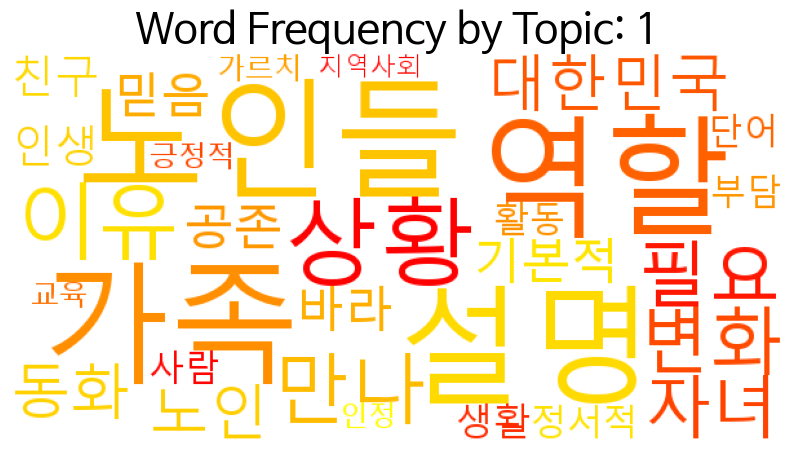

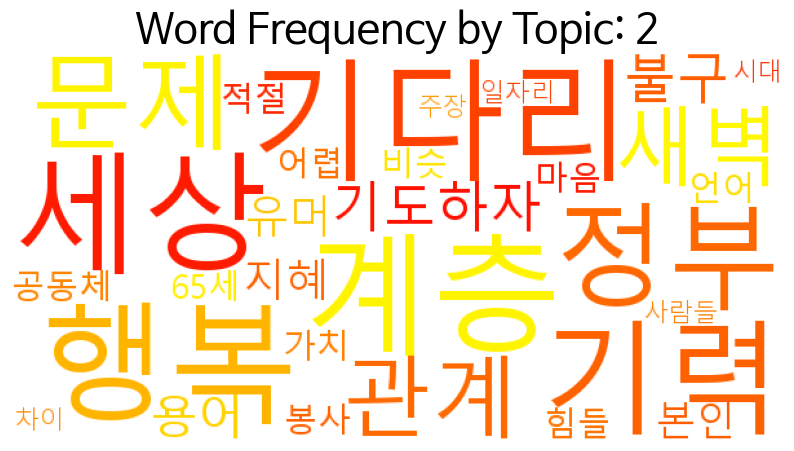

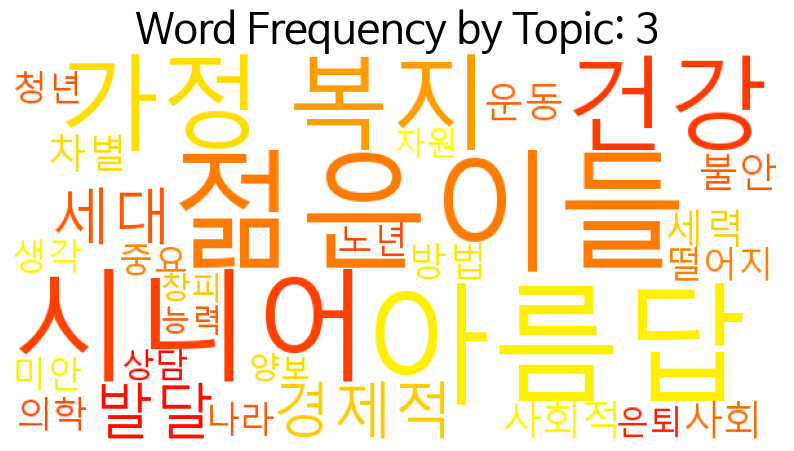

In [34]:
df_interview = df_sub2['Answer_NP'].apply(lambda x: list(x))
df_dict = dict()
df_dict[0] = [j for i in df_interview for j in i]
for key, val in df_dict.items():
    display(key)    
    ### DTM
    sentence_hstack = [" ".join(val)]
    tokenizer = CountVectorizer(max_features=100)
    tokenizer.fit(sentence_hstack)
    sentence_encoded = tokenizer.transform(sentence_hstack).toarray()
    sentence_encoded = sentence_encoded.tolist()
    colnames = [key for key, value in sorted(tokenizer.vocabulary_.items(), key=lambda item: item[1])]
    idxnames = ['sentence' + str(i+1) for i in range(np.shape(sentence_encoded)[0])]
    DTM = pd.DataFrame(sentence_encoded, columns=colnames, index=idxnames)

    ### Coherence Score
    texts = [[word for word in document.split()] for document in DTM]
    idx2word = corpora.Dictionary(texts)
    corpus = [idx2word.doc2bow(text) for text in texts]

    # LDA 모델링
    num_topics = 3
    model_lda = LdaModel(corpus=corpus, id2word=idx2word, num_topics=num_topics, 
                         passes=5, random_state=123)

    # 토픽별 결과 정리
    topic_keyword, topic_kwdfreq = dict(), dict()
    for topic, keywords in model_lda.show_topics(num_words=200):
        topic_keyword[topic] = [keyword.split('*')[1] for keyword in keywords.split('+')]
        topic_kwdfreq[topic] = {keyword.split('*')[1][1:-2]:float(keyword.split('*')[0])  for keyword in keywords.split('+')}

    topic_keyword = pd.DataFrame.from_dict(topic_keyword)
    topic_keyword.columns = ['Topic '+str(i+1) for i in range(num_topics)]
    display(topic_keyword)

    # 빈도수 워드클라우드 시각화
    word_clouder = WordCloud(font_path=r'C:\Windows\Fonts\malgun.ttf',
                             background_color='white',    # 배경색
                             colormap='autumn',    # 글자컬러맵
                             width=600, height=300,    # 폭과 높이로 figsize랑 맞추어야
                             random_state=123,    # 랜덤 시각화 고정
                             prefer_horizontal=True,    # 수평글자로 기록
                             max_font_size=100,    # 최대 폰트 크기
                             max_words=30)    # 표현할 최대 단어 갯수

    for key, val in topic_kwdfreq.items():
        word_cloud = word_clouder.generate_from_frequencies(val)
        plt.figure(figsize=(10,8))    # 캔버스 사이즈
        plt.imshow(word_cloud)
        plt.title('Word Frequency by Topic: ' + str(key+1), fontsize=30)    # 제목과 사이즈
        plt.axis('off')    # 그래프 축을 제거
        plt.show()

# Result2

2023-11-15 01:08:30,701	INFO worker.py:1476 -- Calling ray.init() again after it has already been called.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KK\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\KK\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
2023-11-15 01:08:32,460	INFO worker.py:1476 -- Calling ray.init() again after it has already been called.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KK\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\KK\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
2023-11-15 01:08:34,241	INFO worker.py:1476 -- Calling ray.init() again after it has already been called.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\

training was done. used memory 1.824 Gb
all cohesion probabilities was computed. # words = 579
all branching entropies was computed # words = 1254
all accessor variety was computed # words = 1254
C:/Users/KK/anaconda3/Lib/site-packages/soynlp
cannot access local variable 'f' where it is not associated with a value
cannot access local variable 'f' where it is not associated with a value
before postprocessing 781
_noun_scores_ 264
after postprocessing 177


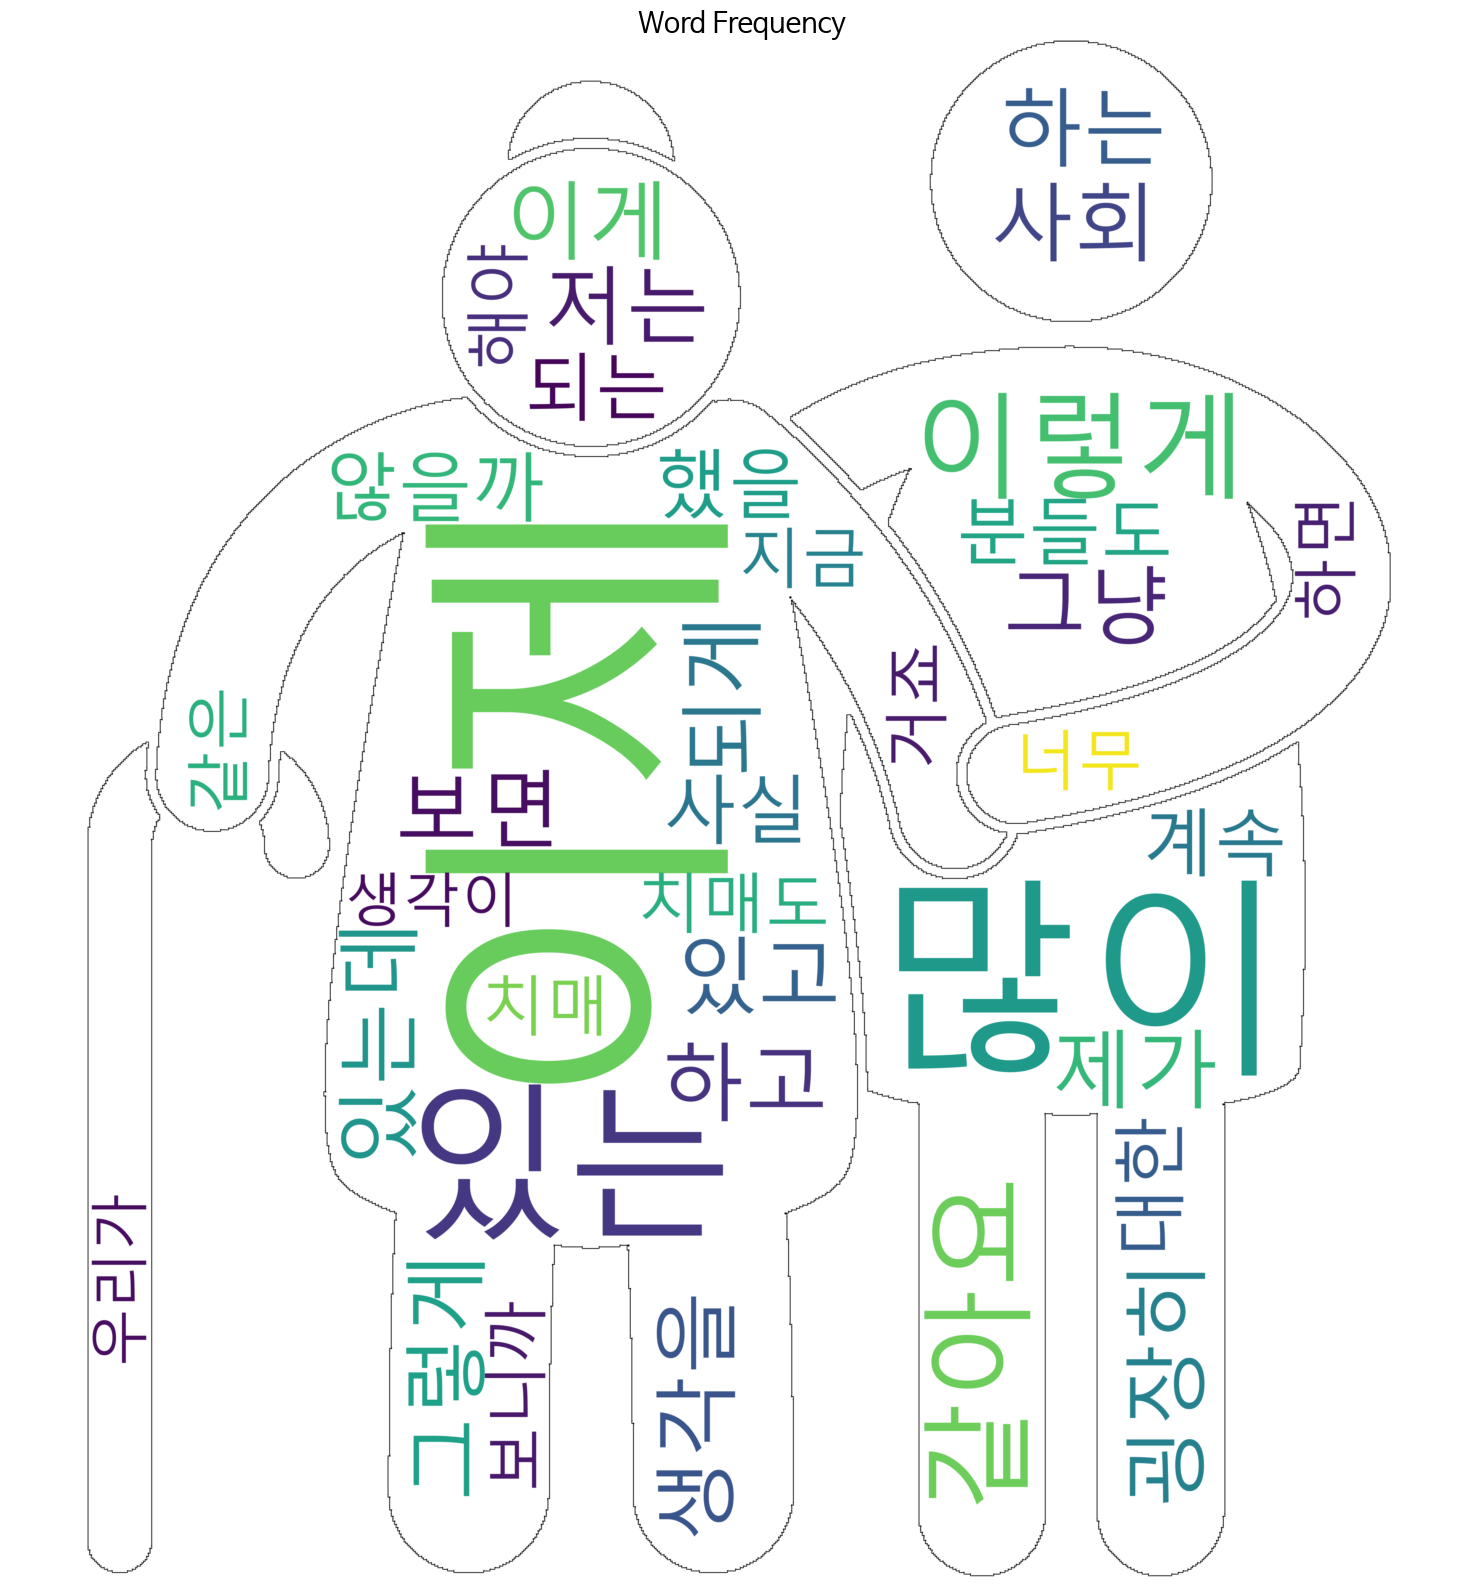

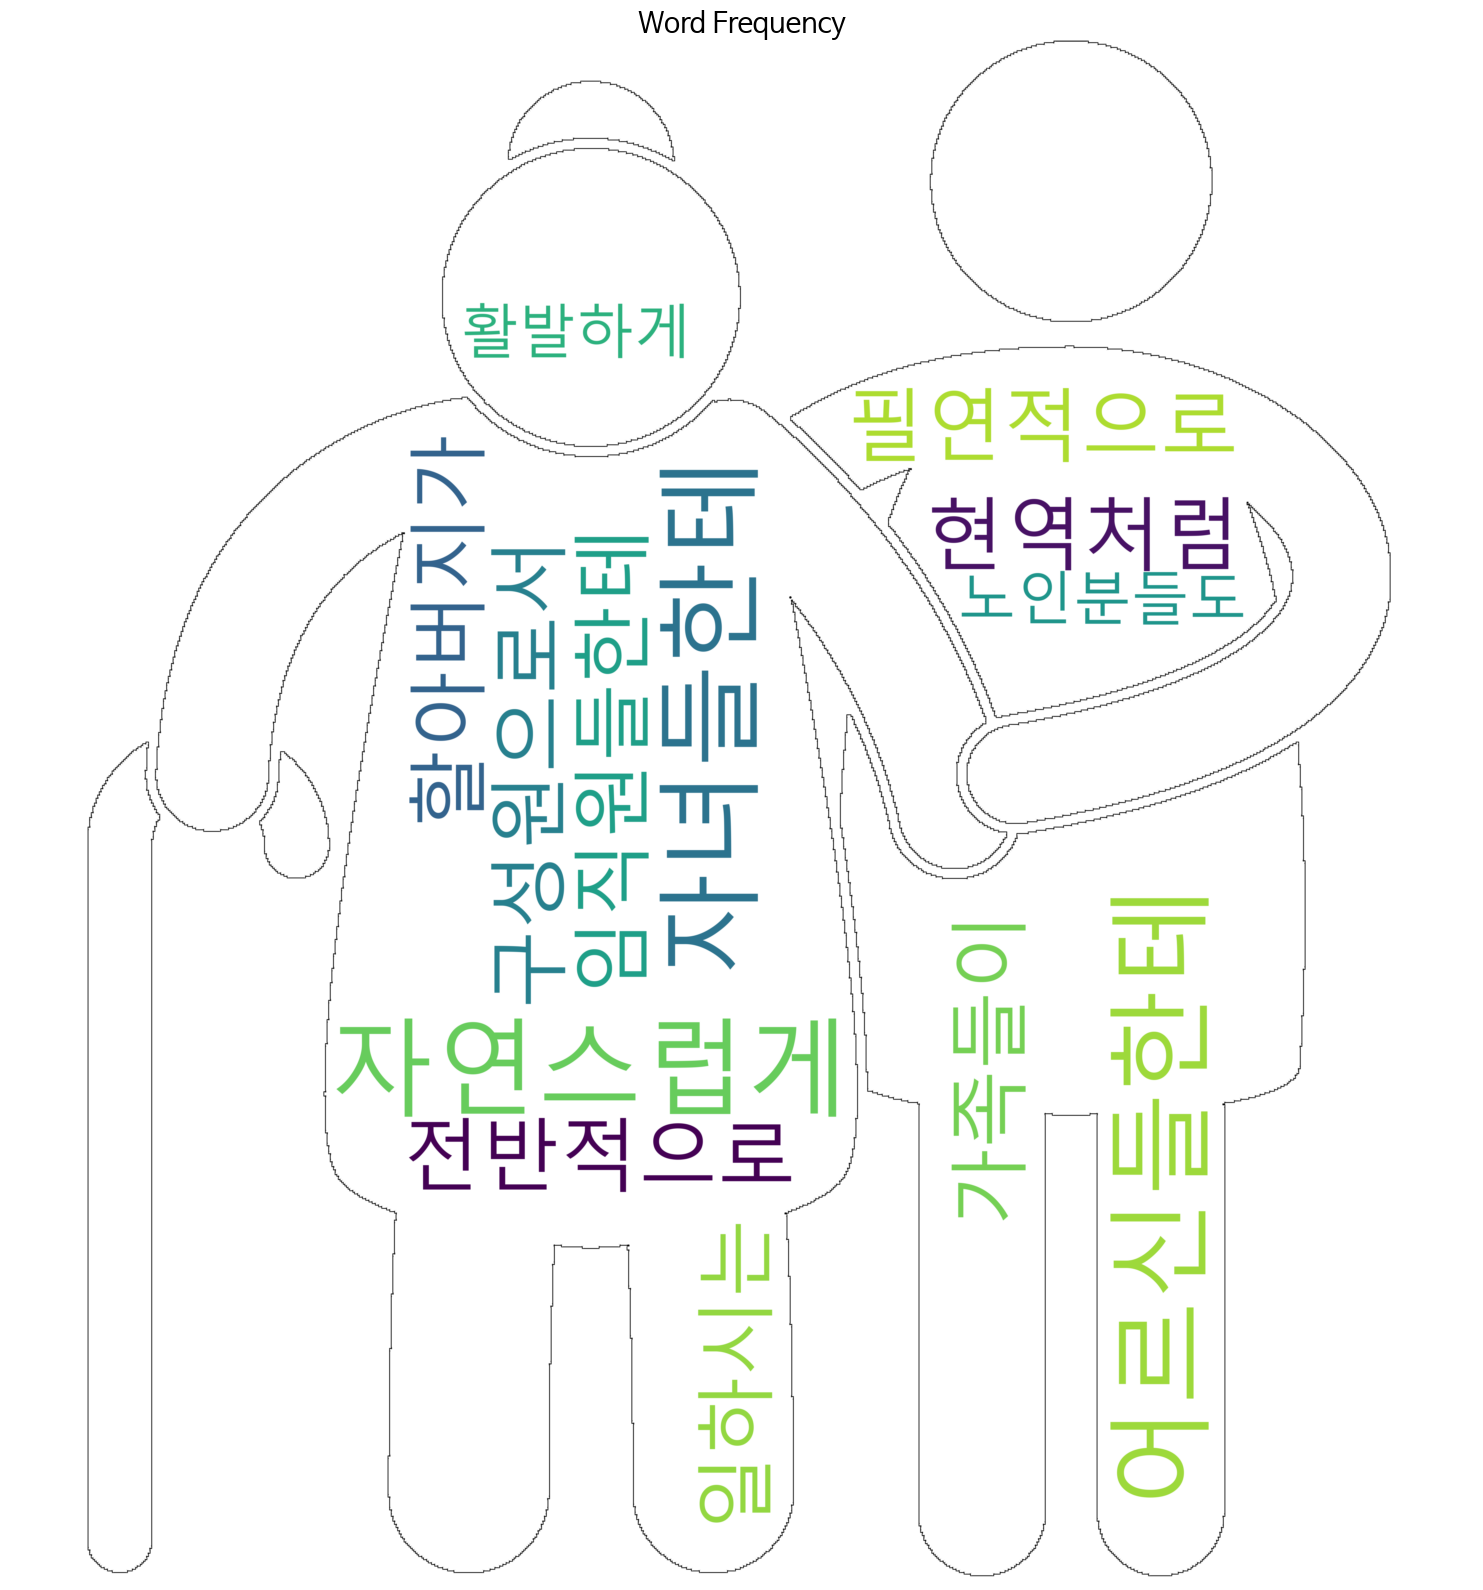

In [79]:
# 데이터 로딩
file_location = os.path.join(os.getcwd(), 'Data', 'Interview', 'interview_text_KK.xlsx')
df = pd.read_excel(file_location)

# 전처리
df.Interview = df.Interview.progress_apply(lambda x: text_preprocessor(x, del_number=False, del_bracket_content=False))

# 단어빈도 추출
wf_soy, waf_soy, \
wf_tf, waf_tf, \
wf_kb, waf_kb = preprocessing_wordfreq(df, colname_target='Interview', colname_category=None,
                                       num_showkeyword=100, save_local=False, save_name='wordfreq_')
waf_soy = waf_soy.sort_values(by='score', ascending=False).reset_index().iloc[:100,:]
waf_tf = waf_tf.sort_values(by='score', ascending=False).reset_index().iloc[:100,:]
waf_kb = waf_kb.sort_values(by='score', ascending=False).reset_index().iloc[:100,:]

# 빈도 시각화
for wf in [wf_tf, wf_kb]:
    plot_wordcloud(wf, mask_location=IMAGE_LOCATION, mask_colorgen=False, max_words=100, save_local=False)